# Stock Market Prediction using LSTM

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers.legacy import adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

## Reading the dataset

In [2]:
import os
os.chdir('stock_data')  
os.listdir()

['.DS_Store',
 'msft.csv',
 'nifty_it_index.csv',
 'infy_stock.csv',
 'tcs_stock.csv']

In [3]:
#Get the Dataset
df=pd.read_csv('msft.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


## Dataset Inspection

In [4]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (9083, 6)
Null Value Present:  False


## Plotting the Adjusted Closing value

<AxesSubplot: xlabel='Date'>

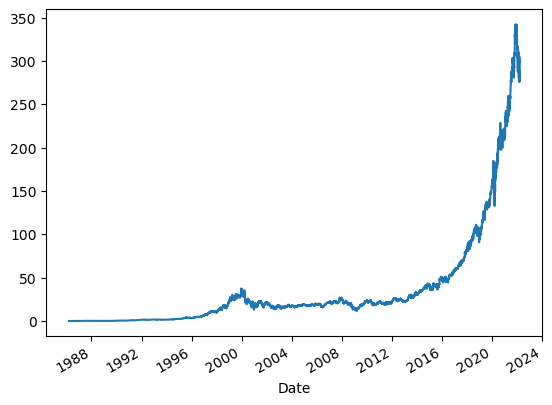

In [5]:
df['Adj Close'].plot()

## Setting the Target Variable and using Feature Transform

In [6]:
#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [7]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
1986-03-13,0.000000,0.000027,0.000000,1.000000
1986-03-14,0.000025,0.000030,0.000025,0.297096
1986-03-17,0.000035,0.000032,0.000036,0.127119
1986-03-18,0.000040,0.000032,0.000030,0.063588
1986-03-19,0.000033,0.000025,0.000025,0.044285


## Splitting the dataset into Training and Testing

In [8]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

## Preparing the Data for LSTM

In [9]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

## Model Building 

In [10]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

Metal device set to: Apple M1 Pro


2023-02-02 14:21:00.056317: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-02 14:21:00.056461: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


## Model Training

In [11]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100


2023-02-02 14:21:00.310261: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-02 14:21:00.761623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1033/1033 [==============================] - 14s 12ms/step - loss: 66.5244
Epoch 2/100
1033/1033 [==============================] - 13s 12ms/step - loss: 215.5645
Epoch 3/100
1033/1033 [==============================] - 12s 12ms/step - loss: 137.1705
Epoch 4/100
1033/1033 [==============================] - 12s 12ms/step - loss: 74.2472
Epoch 5/100
1033/1033 [==============================] - 13s 12ms/step - loss: 35.1443
Epoch 6/100
1033/1033 [==============================] - 13s 12ms/step - loss: 13.5083
Epoch 7/100
1033/1033 [==============================] - 13s 12ms/step - loss: 4.9431
Epoch 8/100
1033/1033 [==============================] - 13s 12ms/step - loss: 2.5278
Epoch 9/100
1033/1033 [==============================] - 13s 12ms/step - loss: 1.7249
Epoch 10/100
1033/1033 [==============================] - 13s 12ms/step - loss: 1.3134
Epoch 11/100
1033/1033 [==============================] - 13s 12ms/step - loss: 1.0763
Epoch 12/100
1033/1033 [==============================] 

1033/1033 [==============================] - 13s 12ms/step - loss: 0.8569
Epoch 96/100
1033/1033 [==============================] - 13s 12ms/step - loss: 0.8569
Epoch 97/100
1033/1033 [==============================] - 13s 12ms/step - loss: 0.8568
Epoch 98/100
1033/1033 [==============================] - 13s 12ms/step - loss: 0.8568
Epoch 99/100
1033/1033 [==============================] - 13s 12ms/step - loss: 0.8568
Epoch 100/100
1033/1033 [==============================] - 12s 12ms/step - loss: 0.8568


## Model Prediction

In [12]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

 1/26 [>.............................] - ETA: 6s

2023-02-02 14:48:46.687675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 0s 5ms/step


## Plotting the True and Predicted Adjusted Closing Values

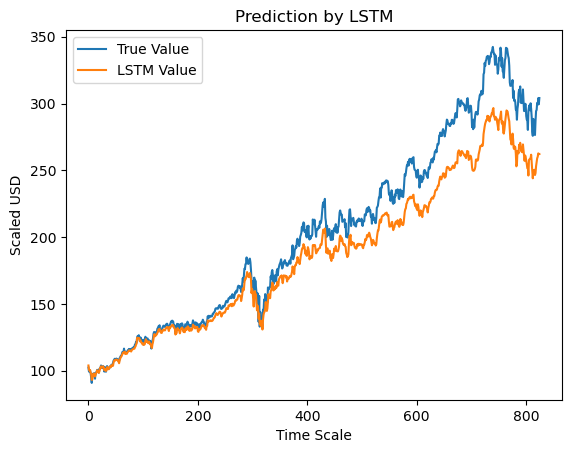

In [14]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()
